# 1: Phase-mixing

Using data from Gaia DR2, [Antoja et al. (2018)](https://arxiv.org/abs/1804.10196) discovered a phase-space spiral in the solar neighbourhood and dubbed it the Galactic snailshell:

Snail shell in star counts             |  Snail shell colored by velocity
:-------------------------:|:-------------------------:
![](./imgs/snail-a.png) | ![](./imgs/snail-bc.png)

In this notebook we will investigate the creation and evolution of phase space spirals.
Phase space spirals like these are 'smoking guns' of non-equilibrium effects. We will build some intuition as to why this is the case.

Below are the steps that you should complete to generate Galactic snail shells and at the end of the notebook there is some example code to help you get started.

### Assignment
> Steps 1-3 are coded below. Implementing the options of step 4 is up to you.
1. Generate a mock stellar distribution of massless tracer particles 
    * Sample the positions and velocities from a Normal distribution
    * Suggested scales (i.e. standard deviation) are: 0.04 kpc and 1 km/s
    * Set the mean positions and velocities such that mean is the a circular orbit at $R = 8.2$ kpc assuming gala's `MilkyWayPotential`
2. Integrate the orbits forward in time and inspect the distribution
    * Integrate the orbits for 2 Gyr
    * Inspect the distribution in $z$-$v_z$ at several intermediate times (like the figure below)
3. Repeat step two but now slightly perturb the distribution:
    * give the distribution a mean $z$ value of 0.1 kpc and a mean $v_z$ value of 2 km/s
    * Integrate and inspect the evolution of the distribution
4. (Optional) repeat step 3 for different offsets and/or different initial conditions
    * Inspect the evolution of the distribution in other phase-space projections
    * Place the distribution at a larger initial $z$ or $v_z$ value
    * ... or at a different initial $R$
    * ... or in a different potential
    * ... or use a different initial scale for the Normal distribution
    * What are the differences? Does the phase space spiral always evolve at the same speed? What influences the shape and/or evolution time?
    * Colour the stars by the orbital energy (= potential + kinetic) - what does it look like?

The final distribution should look something like 

![](./imgs/phase-space-spiral.png)

See also the extended data figure 3 of [Antoja et al. (2018)](https://arxiv.org/abs/1804.10196).

# Code

In [1]:
# Essential - general
import numpy as np
import matplotlib.pyplot as plt

# Essential - astro
import astropy.units as u
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

# Style
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rcParams.update({'font.size': 25})

In [2]:
rng = np.random.RandomState(313)

In [3]:
def make_fig(orbit):
    fig, axes = plt.subplots(ncols=5, figsize=(30,5), sharex=True, sharey=True)

    text_args = dict(x = 0.98, y = 0.99,
                     va='top', ha='right', 
                     fontsize=25)

    for (o, time, ax) in zip(orbit, orbit.t, axes):
        plt.text(s = time.to('Gyr'), transform=ax.transAxes, **text_args)
        ax.scatter(o.z.to('kpc'), o.v_z.to('km/s'), s=0.1, c='k')


        if time.value == 0:
            ax.axvline(0, c='gray', zorder=0, ls='--')
            ax.axhline(0, c='gray', zorder=0, ls='--')

        ax.set_xlabel('$z$ [kpc]')
    axes[0].set_ylabel('$v_z$ [km/s]')

    plt.show()

In [4]:
def orbit_from_w0(w0, H=None, t_end = 2*u.Gyr, n_steps=5):
    if H is None:
        pot = gp.MilkyWayPotential(units = galactic)
        H = gp.Hamiltonian(pot)
    
    return H.integrate_orbit(w0, t1 = 0, t2=t_end, n_steps=n_steps,
                             Integrator=gi.DOPRI853Integrator)

In [5]:
# Milky Way-like potential
pot = gp.MilkyWayPotential(units = galactic)
H = gp.Hamiltonian(pot)

In [6]:
# Generating a mock distribution centered on a circular orbit at the solar position

x_0 = -8.2
vy_0 = pot.circular_velocity([x_0,0,0]*u.kpc).to('km/s').value
N_particles = 1_000

pos = rng.normal(loc=[x_0,0,0], scale=0.1, size=(3, N_particles))
vel = rng.normal(loc=[0,*vy_0,0], scale=1, size=(3, N_particles))

# (pos, vel) -> gala.dynamics.PhaseSpacePosition
w0 = gd.PhaseSpacePosition(pos=pos* u.kpc, 
                           vel=vel * u.km/u.s)

In [7]:
# Integrating the distribution for 100 Myr
orbit = orbit_from_w0(w0, H, t_end = 100*u.Myr)

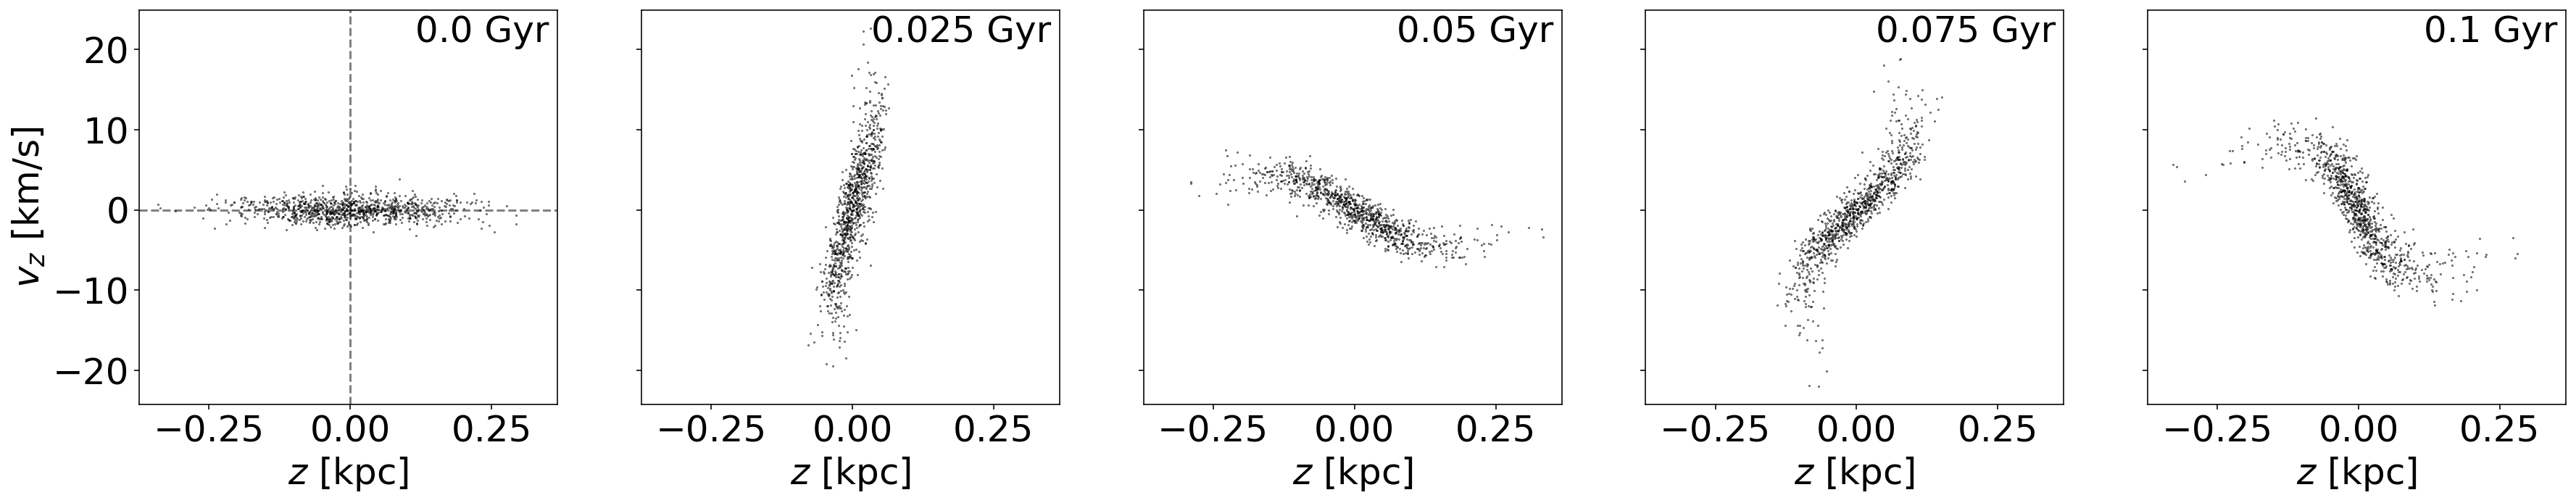

In [8]:
make_fig(orbit)

### $10^4$ stars - $2$ Gyr - no offset

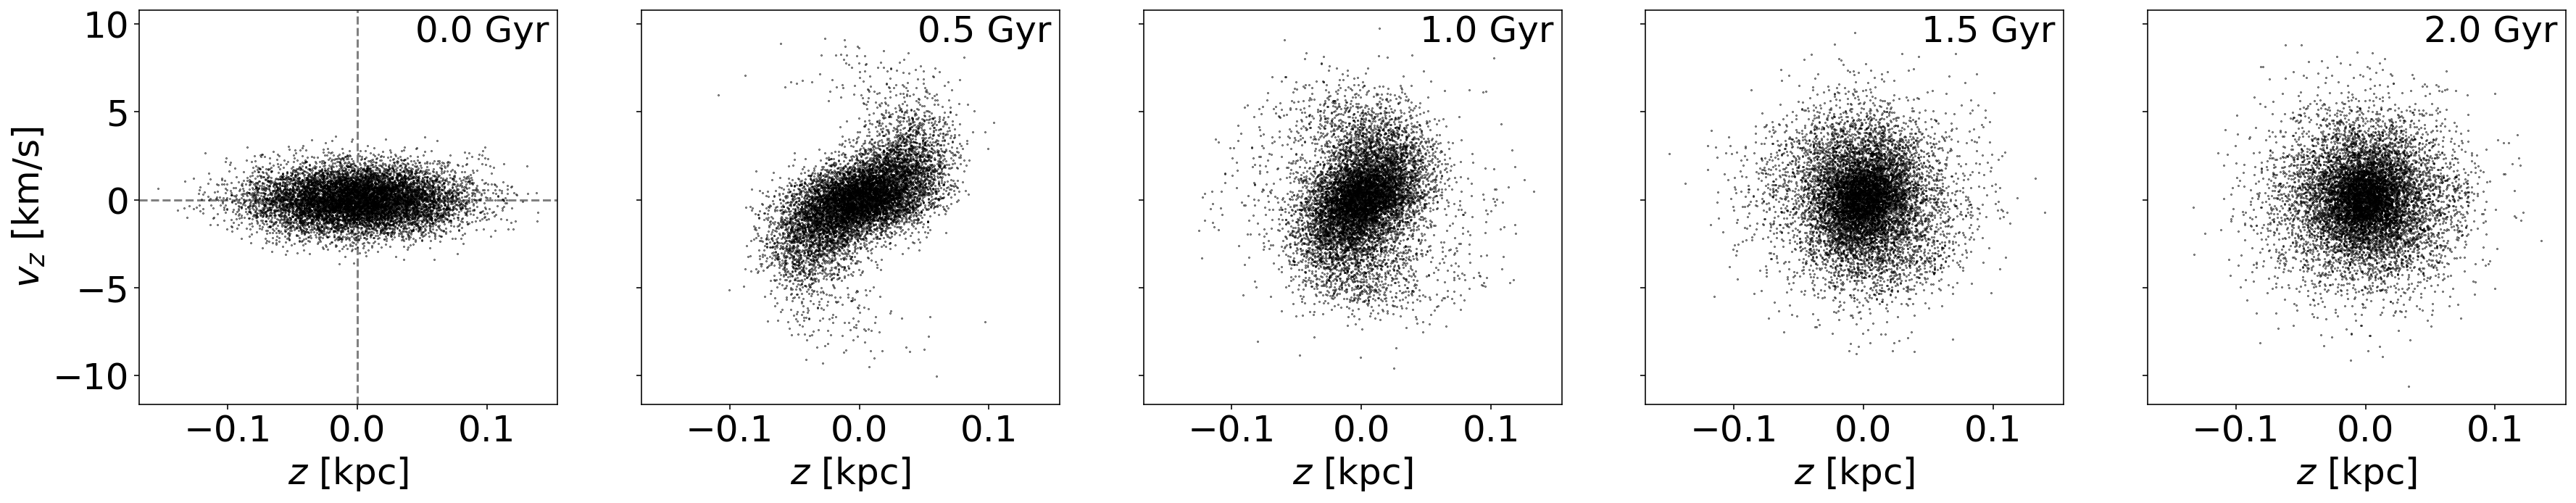

In [9]:
# Repeating for a larger distribution and longer time
N_star = 10_000
pos = rng.normal(loc=[x_0,0,0], scale=0.04, size=(N_star,3)).T 
vel = rng.normal(loc=[0,*vy_0,0], scale=1, size=(N_star,3)).T 

w0 = gd.PhaseSpacePosition(pos=pos*u.kpc, vel=vel* u.km/u.s)

orbit = orbit_from_w0(w0, H)

make_fig(orbit)

### $10^4$ stars - $2$ Gyr - with offset

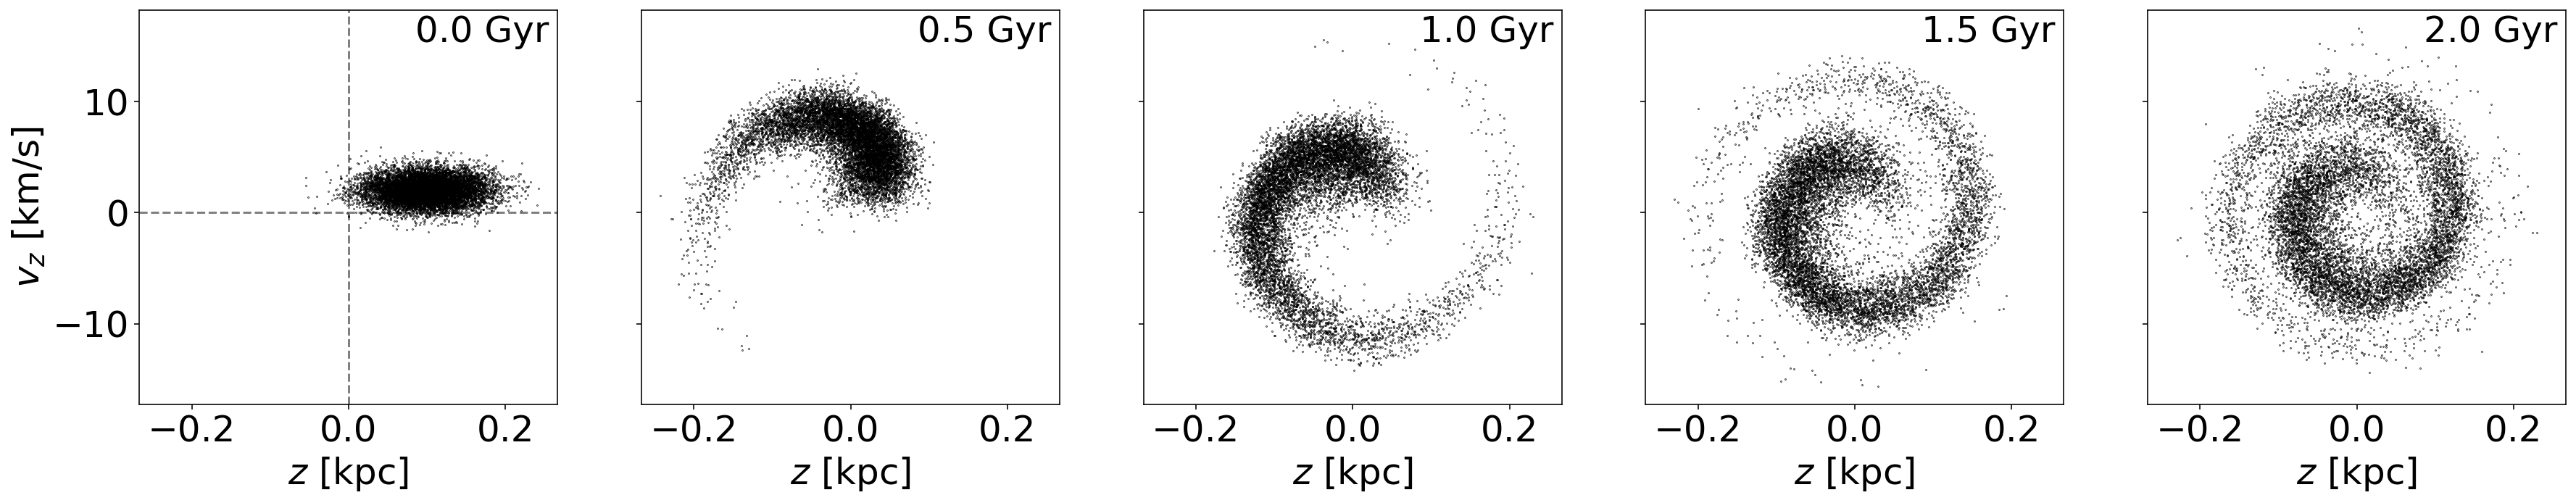

In [10]:
# Repeating for a larger distribution and longer time
N_star = 10_000
pos = rng.normal(loc=[x_0,0,0.1], scale=0.04, size=(N_star,3)).T 
vel = rng.normal(loc=[0,*vy_0,2], scale=1, size=(N_star,3)).T 

# Offset based on Antoja et al. 2018
# https://arxiv.org/abs/1804.10196

w0 = gd.PhaseSpacePosition(pos=pos*u.kpc, vel=vel* u.km/u.s)

orbit = orbit_from_w0(w0, H)

make_fig(orbit)